In [4]:
import pandas as pd
from google.colab import files
from google.colab import data_table

import matplotlib.pyplot as plt

uploaded = files.upload()

Saving data_scientist_salaries.csv to data_scientist_salaries.csv


In [13]:
df = pd.read_csv("/content/data_scientist_salaries.csv")

In [18]:
#boş veri bulunan sütunları gösterme
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
#boş verileri silme
ndf= df.dropna()

work_year             3755
experience_level      3755
employment_type       3755
job_title             3755
salary                3755
salary_currency       3755
salary_in_usd         3755
employee_residence    3755
remote_ratio          3755
company_location      3755
company_size          3755
dtype: int64

In [14]:
#tekrar eden verileri kaldırıyoruz
ndf.drop_duplicates(inplace = True)
ndf

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [17]:
#Veri tiplerini
print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [ ]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [ ]:
#2023'de ki veri bilimi alanları
jobs = ndf[ndf["work_year"] == 2023][["job_title"]]

#2023'de en çok bulunan veri bilimi alanları (ilk 5)
job_counts = jobs['job_title'].value_counts().to_dict()
a =0
for job, count in job_counts.items():
    if(a ==5):
        break
    else:
      a+=1
      print(f"{a}. {job}: {count} ")

1. Data Engineer: 269 
2. Data Scientist: 223 
3. Data Analyst: 195 
4. Machine Learning Engineer: 103 
5. Analytics Engineer: 41 


In [ ]:
#en çok Senior (SE) bulunduran meslek nedir ve kaç tane bulunduruyor ?
exp_level = ndf[ndf["experience_level"] == "SE"][["job_title"]]

exp_level_counts = exp_level['job_title'].value_counts().to_dict()

a=0
for kidem, count in exp_level_counts.items():
    if(a ==1):
        break
    else:
      a+=1
      print(f" {a}. {kidem}: {count} tane Senior (SE) bulunuyor. ")

 1. Data Engineer: 382 tane Senior (SE) bulunuyor. 


Text(0.5, 1.0, "USA'deki şirketlerin kıdem dağılımı")

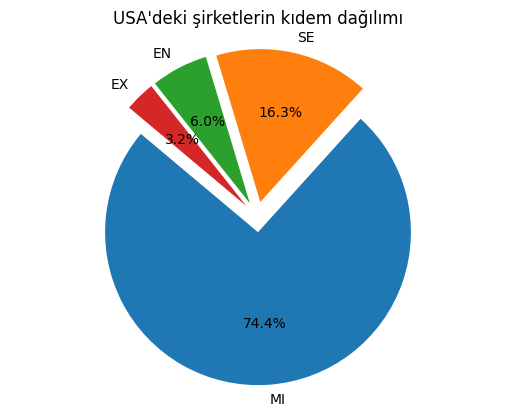

In [21]:
#USA'da ver bilimi alanında bulunan şirketlerin arsındaki kıdem dağılımı
# USA'daki şirketlerin kıdem dağılımını filtreleme
usa_experience_levels = ndf[ndf["company_location"] == "US"]["experience_level"]

# Pasta grafiği çizimi
labels = usa_experience_levels.unique()  #kıdem başlıkları (EX,EN,SE,MI)
sizes = usa_experience_levels.value_counts() #kaçtane veri varsa ona göre boyut ayarlama
explode = (0.1,) * len(labels)  # Her dilim için vurgu oranlarını belirleme

#Pasta grafiği için gerekli parametreleri yerine koyma
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Daireyi çember şeklinde yapma

plt.title("USA'deki şirketlerin kıdem dağılımı") #başlık

In [ ]:
#CT(contact) yani sözleşmeli çalışanların büyük şirketlerde (L) ortalama aldıkları maaş ?

ct = ndf[(ndf["employment_type"] == "CT") & (ndf["company_size"] == "L")][["salary"]]

ct_mean_salary = ct["salary"].mean()

print(f'{int(ct_mean_salary)}')


185000


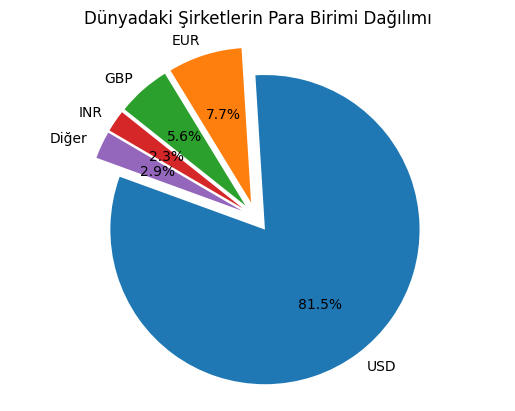

In [ ]:
#Dünyadaki para birimi dağılımı

#Para birimlerini alma
salary_type = ndf["salary_currency"]

# Pasta grafiği çizimi
labels = salary_type.unique() #Para birimi başlıkları
sizes = salary_type.value_counts() #kaçtane veri varsa ona göre boyut ayarlama
explode = (0.1,) * len(labels) # Her dilim için vurgu oranlarını belirleme

# %1'den küçük olanların indekslerini bulma
small_perc_indices = sizes[sizes / sizes.sum() < 0.01].index.tolist()

# %1'den küçük olanları toplama
small_perc_sum = sizes[sizes.index.isin(small_perc_indices)].sum()

# %1'den küçük olanları "Diğer" diye ayarlama
sizes = sizes[sizes.index.isin(small_perc_indices) == False]
sizes['Diğer'] = small_perc_sum

# Explode listesini uzunluğa (sizes) göre oluşturma
explode = (0.1,) * len(sizes)

#Pasta grafiğini oluşturmak için gerekli parametreleri yerine yaz
plt.pie(sizes, labels=sizes.index, explode=explode, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=160)
plt.axis('equal')
plt.title("Dünyadaki Şirketlerin Para Birimi Dağılımı")

plt.show()